### *Importing & Loading what we need* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv('DataSet/Mall_Customers.csv')

In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### *Data Preprocessing*

In [3]:
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (200, 5)


In [4]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 4


### *EDA & Data Visualisation* 

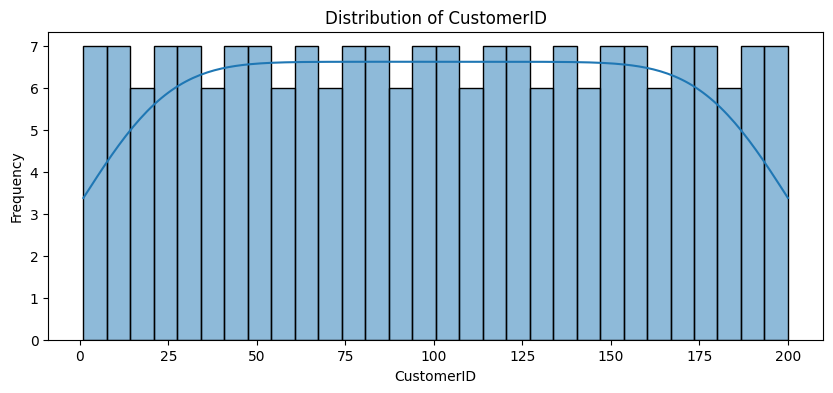

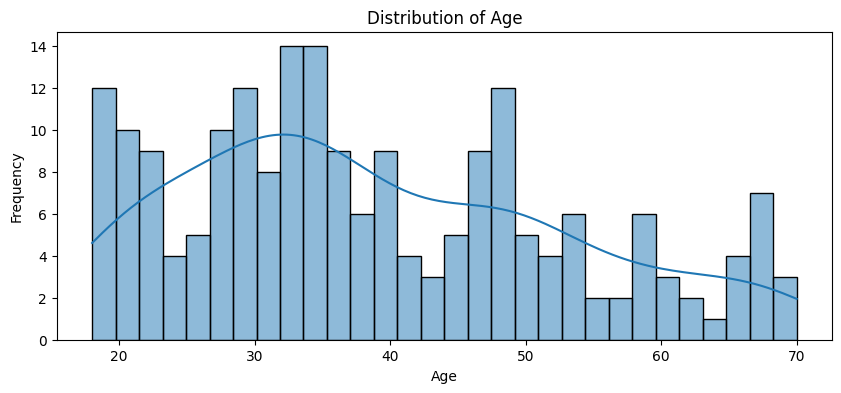

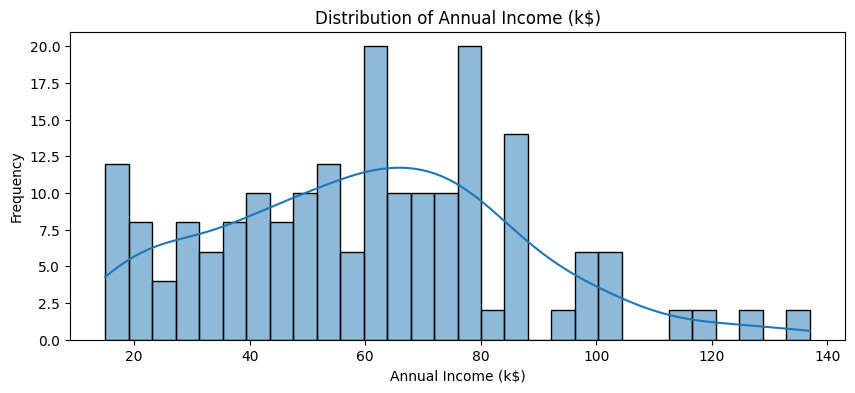

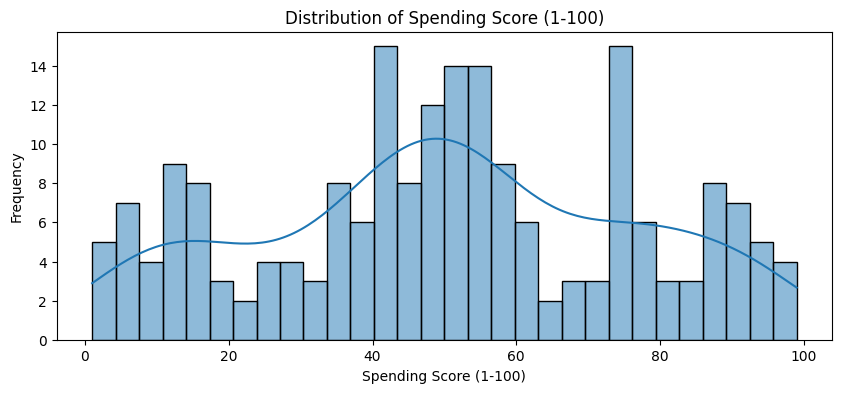

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

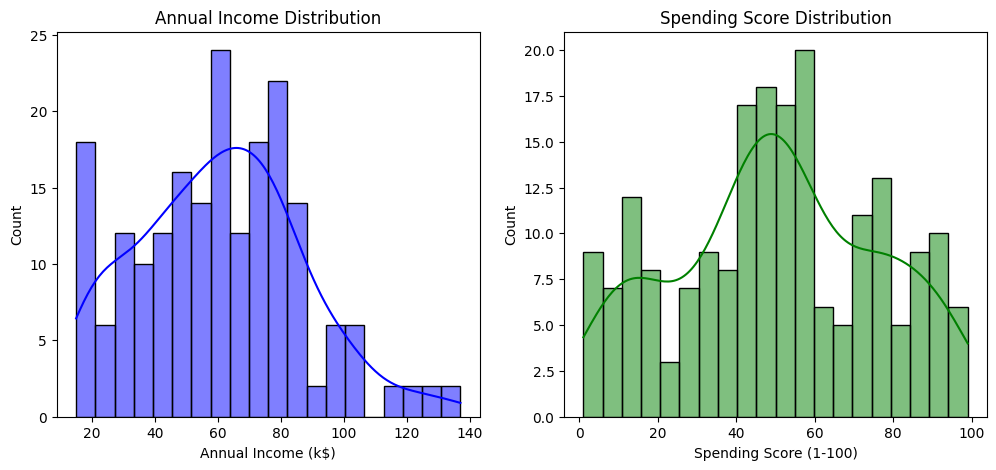

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data["Annual Income (k$)"], kde=True, bins=20, color="blue")
plt.title("Annual Income Distribution")

plt.subplot(1,2,2)
sns.histplot(data["Spending Score (1-100)"], kde=True, bins=20, color="green")
plt.title("Spending Score Distribution")
plt.show()

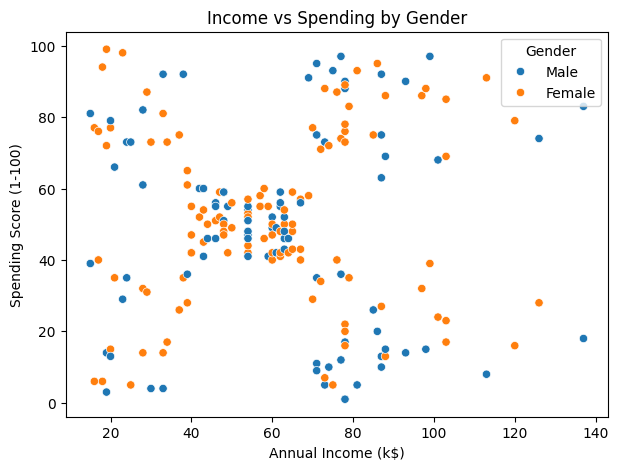

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=data)
plt.title("Income vs Spending by Gender")
plt.show()


In [11]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

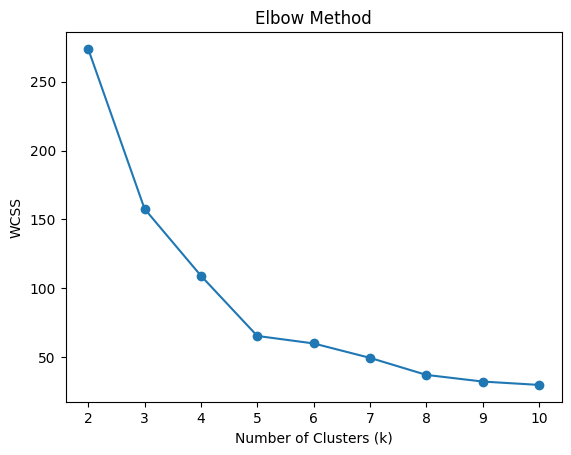

In [12]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

The Elbow Method plot shows a steep decline in WCSS (within-cluster sum of squares) as the number of clusters increases from 2 to 5. After k=5, the rate of decrease slows down, and the curve starts to flatten. This indicates that 5 clusters provide the best balance between model simplicity and cluster separation.

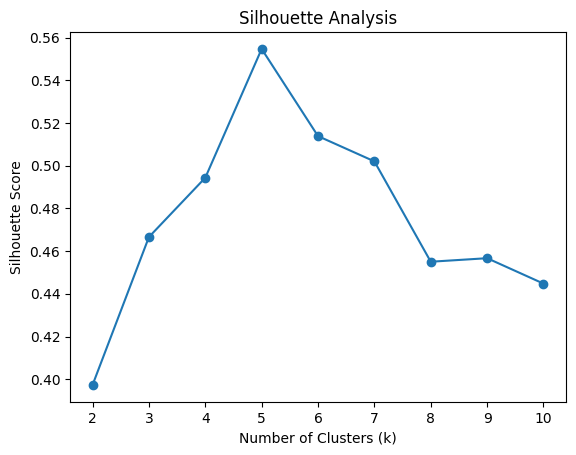

In [13]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2,11), silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

The Silhouette Analysis confirms that k=5 provides the highest silhouette score (≈0.56), indicating well-separated and meaningful clusters. While values between 0.5–0.7 are generally considered good, the drop in score after 5 clusters suggests that additional clusters reduce cohesion and separation. This supports the Elbow Method finding that 5 clusters is the optimal choice for segmenting customers in this dataset.

In [14]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

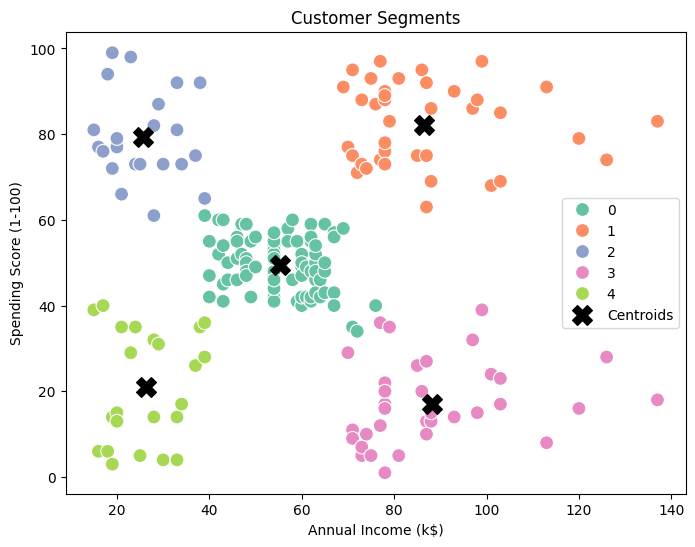

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", 
                y="Spending Score (1-100)", 
                hue="Cluster", 
                palette="Set2", 
                data=data, s=100)

# plot centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], 
            c="black", s=200, marker="X", label="Centroids")

plt.title("Customer Segments")
plt.legend()
plt.show()


The scatter plot shows how customers are grouped into five clusters using K-Means, based on their Annual Income and Spending Score.

* ***Cluster 0 (Average Spenders):*** Moderate income and average spending. Steady but not exceptional contributors.
  
* ***Cluster 1 (Premium Customers):*** High income, high spending. Loyal and profitable segment – the top priority for retention and premium offers.

  
* ***Cluster 2 (Standard Customers):*** Average income, high spending. Valuable group with potential for upselling and cross-selling.
  
* ***Cluster 3 (Cautious Wealthy Customers):*** High income, low spending. They can afford more but remain reluctant; need trust-building and personalized offers.
  
* ***Cluster 4 (Impulsive Customers):*** Low income, high spending. They spend despite limited income – can be engaged with affordable deals and discounts.

In [16]:
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().round(2)
cluster_summary

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.30,49.52
1,86.54,82.13
2,25.73,79.36
3,88.20,17.11
4,26.30,20.91


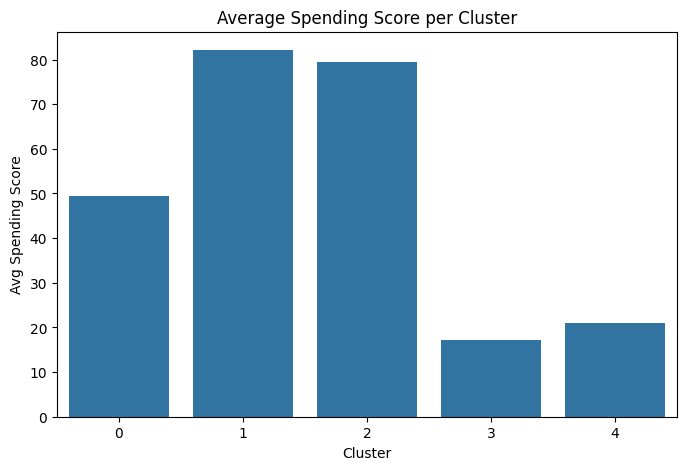

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=cluster_summary.index, 
            y=cluster_summary["Spending Score (1-100)"])

plt.title("Average Spending Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Avg Spending Score")
plt.show()

The bar chart highlights how much each cluster spends on average:

* ***Highest Spending Clusters***:
    * Cluster 1 (83) and Cluster 2 (80) → These are the most valuable customers, forming the core revenue base.

* ***Moderate Spending:***
    * Cluster 0 (~50) → Average spenders; potential to be nurtured with promotions.

* ***Lowest Spending Clusters:***
    * Cluster 4 (21) and Cluster 3 (17) → Minimal contributors. Cluster 4 may still be responsive to budget promotions, while Cluster 3 needs strategic re-engagement.

Strategic Recommendations:

* **Focus heavily on Clusters 1 & 2** → Provide loyalty programs, VIP services, and personalized experiences to retain them.
  
* **Nurture Cluster 0** → Encourage higher spending through targeted campaigns.
  
* **Investigate Cluster 3** → Understand why wealthy customers aren’t spending; improve value proposition.

* **Engage Cluster 4 carefully** → Offer discounts and deals but avoid over-investment, as their income limits long-term profitability.